Automatically created module for IPython interactive environment


<ipython-input-37-04754661534b>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-37-04754661534b>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-37-04754661534b>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-37-04754661534b>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-37-04754661534b>:48: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


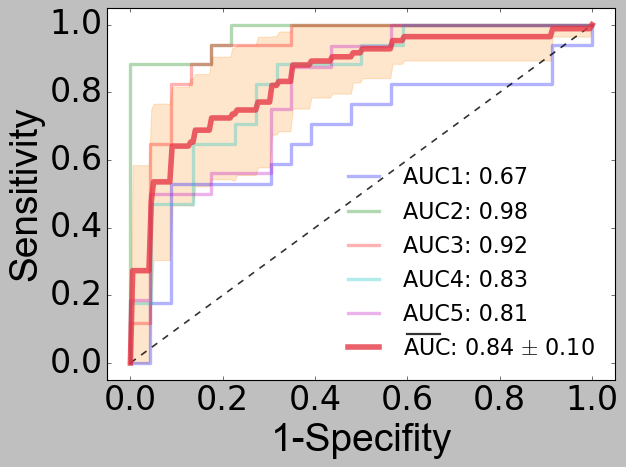

In [37]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import naive_bayes
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn import linear_model

# #############################################################################
# Data IO and generation

# Import some data to play with
# 读入数据
skin = pd.read_excel(r'D:\Fourth_year_in_ICCAS\Glow_discharge\Machine_learning2\Machine_learning.xlsx')
iris = datasets.load_iris()
skin.y = skin.y.map({'HC':0,'BC':1})
X = skin.iloc[:,1:]
y = skin.y
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(97)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
#classifier = svm.SVC(kernel='linear', probability=True,random_state=random_state)
# classifier = naive_bayes.GaussianNB()
classifier = linear_model.LogisticRegression()
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1,200)
plt.style.use("classic")
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=0.3,label='AUC%d: %0.2f' % (i+1, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='#000000',alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='#e63946',label=r'AUC: %0.2f $\pm$ %0.2f' % (mean_auc, std_auc),lw=5, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='#fb8500', alpha=.2)
                 #label=r'$\pm$ 1 std. dev.')
font1={'family' : 'Arial', 'size'   : 35}
font2={'family' : 'Arial', 'size'   : 30}
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('1-Specifity',font1)
plt.ylabel('Sensitivity',font1)
# plt.text(0.4,0.3,'5-Folds Cross Validation' , font2)
#plt.text(0.5,0.20,'Mean ROC' , font2)
#plt.text(0.3,0.07,'Mean AUC=0.84±0.10' , font2)
plt.plot([0.6, 0.67], [0.085, 0.085], linestyle='-', lw=2, color='#000000',alpha=.8)
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",frameon=False,handlelength=2, fontsize=20)
plt.tight_layout() #解决导出后显示不全的问题
plt.savefig('D:\Fourth_year_in_ICCAS\Glow_discharge\Machine_learning2\Logistc_Regression_Cross_validation.jpg',transparent = True, dpi=300) #transparent 可用于设置透明背景
# 显示图形
plt.show()